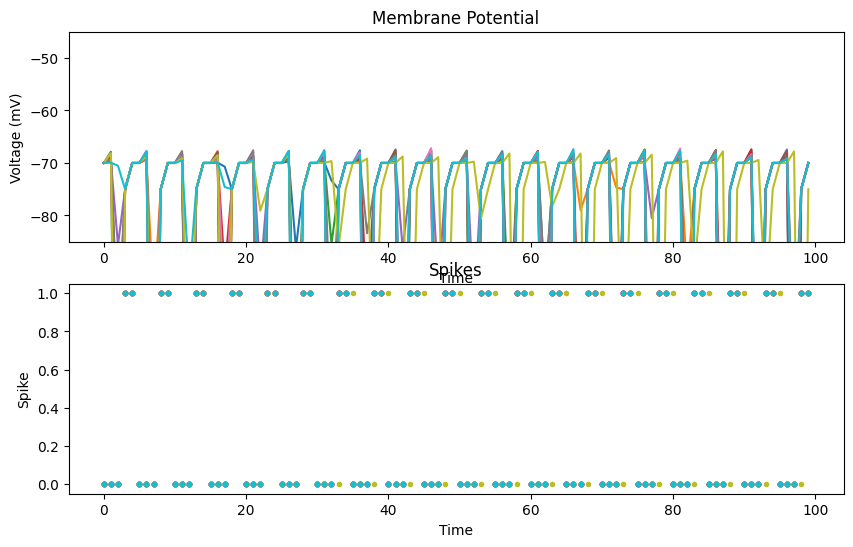

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_neurons = 10
num_layers = 3
num_timesteps = 100
dt = 0.001

# Neuron model
V_rest = -70
V_threshold = -55
V_reset = -75
tau_m = 0.02
tau_ref = 0.002

# Synaptic connections
W_ff = np.random.rand(num_neurons, num_neurons) * 0.1
W_fb = np.random.rand(num_neurons, num_neurons) * 0.1

# Spike-Timing Dependent Plasticity (STDP) learning rule
tau_stdp = 0.02
A_plus = 0.01
A_minus = -0.01

# Input data
X = np.random.rand(num_neurons, num_timesteps)

# Initialize variables
V = np.zeros((num_neurons, num_timesteps))
V[:, 0] = V_rest
spikes = np.zeros((num_neurons, num_timesteps))

# Simulation loop
for t in range(1, num_timesteps):
    # Calculate feedforward current
    I_ff = np.dot(W_ff, spikes[:, t-1])

    # Calculate feedbackward current
    I_fb = np.dot(W_fb, spikes[:, t-1])

    # Calculate total input current
    I_in = X[:, t] + I_ff + I_fb

    # Update membrane potential
    V[:, t] = V[:, t-1] + (-V[:, t-1] + V_rest + I_in * dt / tau_m) / tau_m

    # Generate spikes
    spike_indices = np.where(V[:, t] > V_threshold)[0]
    spikes[spike_indices, t] = 1
    V[spike_indices, t] = V_reset

    # Refractory period
    refractory_indices = np.where(spikes[:, t-1] == 1)[0]
    V[refractory_indices, t] = V_rest

    # STDP learning rule
    for i in range(num_neurons):
        for j in range(num_neurons):
            if spikes[i, t-1] == 1 and spikes[j, t] == 1:
                delta_w = A_plus * np.exp(-(t - 1 - tau_stdp) / tau_stdp)
                W_ff[i, j] += delta_w
            elif spikes[i, t-1] == 0 and spikes[j, t] == 1:
                delta_w = A_minus * np.exp(-(t - 1 - tau_stdp) / tau_stdp)
                W_fb[j, i] += delta_w

# Plot results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.title("Membrane Potential")
plt.plot(V.T)
plt.xlabel("Time")
plt.ylabel("Voltage (mV)")
plt.ylim(V_reset - 10, V_threshold + 10)
plt.subplot(2, 1, 2)
plt.title("Spikes")
plt.plot(spikes.T, ".")
plt.xlabel("Time")
plt.ylabel("Spike")
plt.show()

In [3]:
W_ff

array([[0.05123361, 0.03167232, 0.00716262, 0.06426826, 0.04531548,
        0.03808549, 0.0846925 , 0.04858482, 0.05116762, 0.06568144],
       [0.02437841, 0.07479908, 0.03411854, 0.0728951 , 0.03590703,
        0.06069719, 0.05153712, 0.0206832 , 0.01075774, 0.03760866],
       [0.0836664 , 0.04358565, 0.03325421, 0.00723519, 0.0953346 ,
        0.00139382, 0.0348194 , 0.00505858, 0.0438806 , 0.02921486],
       [0.05974372, 0.03796917, 0.09969718, 0.07080511, 0.00079605,
        0.03011997, 0.04311811, 0.02843157, 0.06795289, 0.00210527],
       [0.00146065, 0.04669732, 0.04565285, 0.03412246, 0.02976885,
        0.06544289, 0.04017397, 0.07117677, 0.03598486, 0.07200996],
       [0.04804395, 0.03951735, 0.05321151, 0.08232299, 0.03816161,
        0.04865433, 0.01473039, 0.03967227, 0.09129116, 0.06214601],
       [0.00075471, 0.01596321, 0.01002969, 0.05524635, 0.09005927,
        0.07075531, 0.07403215, 0.05480628, 0.07730188, 0.07181683],
       [0.01042546, 0.01704679, 0.0068706